### 先验概率分布
+ $P(\theta)$
+ 没有数据支撑的情况下，某事件发生的概率
+ 可以通过历史经验进行估计

### 似然函数分布
+ $P(X|\theta)$
+ 有着两个变量的函数
    + 如果将θ设为常量，则你会得到一个概率函数（关于X的函数）
    + 如果将X设为常量, 则将得到似然函数（关于θ的函数）


### 后验概率分布
+ $P(\theta|X)$
+ 在有新的数据X的情况下，利用贝叶斯公式对先验概率进行修正，而后得到的条件概率

### 贝叶斯规则在机器学习场景的应用
+ $P(\theta \mid$ data $)=\frac{P(\text { data } \mid \theta) P(\theta)}{P(\text { data })} \propto P($ data $\mid \theta) P(\theta)$
+ $P(\theta \mid$ X $)=\frac{P(\text { X } \mid \theta) P(\theta)}{P(\text { X })} \propto P($ X $\mid \theta) P(\theta)$

### 例子 1 硬币问题(似然函数的应用)
+ 有一个硬币，它有θ的概率会正面向上，有1-θ的概率反面向上
+ θ是存在的，但是不知道它是多少
+ 为了获得θ的值，做了一个实验
    + 将硬币抛10次，得到了一个正反序列：x=HHTTHTHHHH
    + 无论θ的值是多少，这个序列的概率值为 θ⋅θ⋅(1-θ)⋅(1-θ)⋅θ⋅(1-θ)⋅θ⋅θ⋅θ⋅θ = θ⁷ (1-θ)³

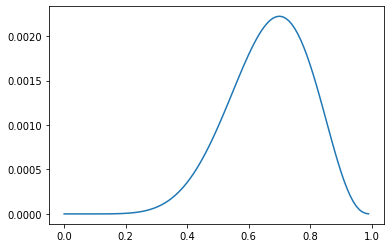

In [2]:
# 图像法 求解硬币问题
# 下图中发现 $\theta$ 为 0.7 附近时间， 序列概率为最大，通过最大似然的当时进行参数估计
import matplotlib.pyplot as plt
import numpy 
theta = numpy.arange(0, 1, 0.01)
prob = [ item**7 * (1-item) **3 for item in theta]
plt.plot(theta, prob)
plt.show()

In [9]:
# 最大似然估计法
# 求 \theta 使得  θ⋅θ⋅(1-θ)⋅(1-θ)⋅θ⋅(1-θ)⋅θ⋅θ⋅θ⋅θ = θ⁷ (1-θ)³ 出现的概率最大
# 一阶导数为零的点 有 [0, 7/10, 1]这三个，通过二阶导数判断 7/10 为
from sympy  import symbols, diff, solve
x = symbols('x')
 
z = x**7 * (1-x)**3
z1 = diff(z,x) #求一阶导
x_hat = solve(z1, x)
print(x_hat)


[0, 7/10, 1]


### 例子 射击问题(贝叶斯规则的应用)
+ 8 支步枪中有5支校准过，3支未校准
+ 一名射手用校准过的枪射击，命中率为0.8，用未校准的枪射击，命中率为0.3
+ 现在从8支步枪中随机选择1支，进行射击，结果中靶
+ 求该枪使已经校准过的概率

+ 设 枪被校准的概率 为 $\theta$, 则 选择到 被 校准的枪的概率$P(\theta=1)=5/8$, 选择到未被校准的枪的概率 $P(\theta=0) =  3/8$
+ 定义的枪命中的概率为 $P(X=1) $， 枪不中的概率为 $P(X=0) $
+ 根据条件得到以下公式
    + 在已经校准的情况下命中的概率为, $P( X=1 | \theta=1 ) = 0.8 $
    + 在未校准的情况下命中的概率为, $P(X=1 | \theta=0 ) = 0.3 $
    + 在已经校准的情况下未命中的概率为, $P( X=0 | \theta=1 ) = 0.3 $
    + 在未校准的情况下未命中的概率为, $P( X=0 | \theta=0) = 0.7 $
+ 求中靶情况下时，该枪是已经校准的概率
    + $P( \theta=1 | X=1 ) = \frac{P( X=1 | \theta=1 ) P( \theta=1 )}{\sum P( X=1 | \theta=i ) P(\theta=i)} = \frac{0.8 * 5/8}{0.8*5/8 + 0.3 * 3/8} = 0.8163$